In [148]:
# Please try the following sequence to fine tune the parameters
# Learning Rate > Optimizer > Number of Layers > Number of neurons per layer > Activation Functions > Batch Size
# You can also increase the number of data sample, epoc

import tensorflow as tf
from tensorflow import keras

### Preparing the Data

In [149]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print( X_train_full.shape )
print( X_train_full.dtype )
# print( X_train_full[0] )
# print( y_train_full[0] )

(60000, 28, 28)
uint8


In [150]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(X_train.shape)
print(X_valid.shape)

(55000, 28, 28)
(5000, 28, 28)


In [151]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Build the Model

In [152]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_24 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [153]:
model.layers

In [154]:
hidden1 = model.layers[1]
weights, bias = hidden1.get_weights()
print(weights.shape)
print(bias.shape)

(784, 300)
(300,)


### Compling the Model

In [155]:
model.compile(loss="sparse_categorical_crossentropy", 
             optimizer=keras.optimizers.SGD(lr=0.005),
             metrics=["accuracy"])

### Fit the Model

In [156]:
early_stopping_callback = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# default batch_size = 32
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    validation_data=(X_valid, y_valid),
                    batch_size=32,
                   callbacks=[early_stopping_callback])

Epoch 1/30
5500/5500 [==============================] - 11s 2ms/step - loss: 0.6504 - accuracy: 0.7793 - val_loss: 0.4971 - val_accuracy: 0.8222
Epoch 2/30
5500/5500 [==============================] - 10s 2ms/step - loss: 0.4570 - accuracy: 0.8391 - val_loss: 0.4575 - val_accuracy: 0.8386
Epoch 3/30
5500/5500 [==============================] - 10s 2ms/step - loss: 0.4116 - accuracy: 0.8543 - val_loss: 0.3849 - val_accuracy: 0.8698ETA: 0s - loss: 0.4133  - ETA: 0s - loss: 0.4117 - accuracy: 0.85
Epoch 4/30
5500/5500 [==============================] - 10s 2ms/step - loss: 0.3855 - accuracy: 0.8637 - val_loss: 0.3791 - val_accuracy: 0.8646
Epoch 5/30
5500/5500 [==============================] - 10s 2ms/step - loss: 0.3656 - accuracy: 0.8699 - val_loss: 0.3594 - val_accuracy: 0.8714
Epoch 6/30
5500/5500 [==============================] - 11s 2ms/step - loss: 0.3484 - accuracy: 0.8768 - val_loss: 0.3417 - val_accuracy: 0.8790
Epoch 7/30
5500/5500 [==============================] - 10s 2ms/s

### Plot the loss and accuracy

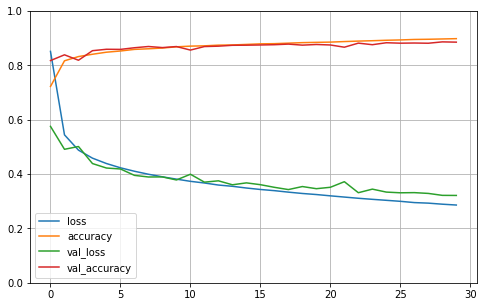

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Evalute the Model with the test data

In [80]:
model.evaluate(X_test/255.0, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8720


[0.355098158121109, 0.871999979019165]

### Use the model to predict the class

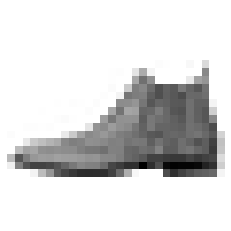

Ankle boot


In [107]:
import matplotlib as mpl
import matplotlib.pyplot as plt

test = X_test[0]
test_image = test.reshape(28,28)
plt.imshow(test_image, cmap="binary")
plt.axis("off")
plt.show()

print(class_names[y_test[0]])

In [134]:
y_proba = model.predict(X_test[:10]/255.0)
print(y_proba.round(2))
print(y_test[:10])

[[0.   0.   0.   0.   0.   0.03 0.   0.05 0.   0.92]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.16 0.   0.04 0.01 0.02 0.   0.76 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.96 0.   0.03 0.   0.   0.  ]
 [0.   0.   0.01 0.   0.05 0.   0.94 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.97 0.   0.02 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]]
[9 2 1 1 6 1 4 6 5 7]


In [146]:
# add new axis to make the 2d array to form a 3d array
import numpy as np
y_proba = model.predict(X_test[0, np.newaxis]/255.0)
print(y_proba.round(2))
print(y_test[0])

[[0.   0.   0.   0.   0.   0.03 0.   0.05 0.   0.92]]
9
